# import required libraries

In [1]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string 
import seaborn as sns


from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import snscrape.modules.twitter as sntwitter

In [2]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report


# load the dataset

In [4]:
tweets=pd.read_csv("D:\\dataset\\Russia_invade.csv")


In [5]:
tweets=pd.read_csv("D:\\dataset\\Russian_border_Ukraine.csv")

In [6]:
tweets=pd.read_csv("D:\\dataset\\Russian_troops.csv")

In [7]:
tweets=pd.read_csv("D:\\dataset\\Ukraine_border.csv")

In [8]:
tweets=pd.read_csv("D:\\dataset\\Ukraine_nato.csv")

In [9]:
tweets.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/2_4_5T_2_4_D/status/150025...,2022-03-05 23:59:59+00:00,@ronanmcmanus @carolecadwalla @estellecostanza...,@ronanmcmanus @carolecadwalla @estellecostanza...,1500259863447887872,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine NATO
1,snscrape.modules.twitter.Tweet,https://twitter.com/ty_phoon31/status/15002598...,2022-03-05 23:59:58+00:00,https://t.co/Z1pURKlNHu NATO followed USA into...,abc.net.au/news/2022-03-0… NATO followed USA i...,1500259857160568834,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine NATO
2,snscrape.modules.twitter.Tweet,https://twitter.com/FREIderIII/status/15002598...,2022-03-05 23:59:56+00:00,"The weapons, Fighter jets, artillery. missiles...","The weapons, Fighter jets, artillery. missiles...",1500259850491772934,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Ukraine', 'Ukraine']",NaN,Ukraine NATO
3,snscrape.modules.twitter.Tweet,https://twitter.com/Katareya2006/status/150025...,2022-03-05 23:59:53+00:00,A Trailer has been released of Warner Bros lat...,A Trailer has been released of Warner Bros lat...,1500259837137256448,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Ukraine️', 'Russia', 'StopTheWar']",NaN,Ukraine NATO
4,snscrape.modules.twitter.Tweet,https://twitter.com/EgyptsNo1/status/150025983...,2022-03-05 23:59:52+00:00,"@HuizengaWest I disagree, Putin did not threat...","@HuizengaWest I disagree, Putin did not threat...",1500259834234650626,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,0,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine NATO


In [10]:
tweets.tail()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
245227,snscrape.modules.twitter.Tweet,https://twitter.com/CreativitysCall/status/147...,2021-12-31 00:03:17+00:00,"NATO ally or not, the democratically elected g...","NATO ally or not, the democratically elected g...",1476705480726745092,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine NATO
245228,snscrape.modules.twitter.Tweet,https://twitter.com/Garret00074/status/1476705...,2021-12-31 00:02:06+00:00,@remid0d0s0 @BillKristol But how do you give h...,@remid0d0s0 @BillKristol But how do you give h...,1476705183329665024,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.476705e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine NATO
245229,snscrape.modules.twitter.Tweet,https://twitter.com/SyriaObReloaded/status/147...,2021-12-31 00:01:33+00:00,@Lee__Drake NATO-supplied Georgian military. S...,@Lee__Drake NATO-supplied Georgian military. S...,1476705046242889733,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.476705e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine NATO
245230,snscrape.modules.twitter.Tweet,https://twitter.com/Prokofyev_v/status/1476704...,2021-12-31 00:00:52+00:00,Two side notes here:\n\na) Can we really say t...,Two side notes here:\n\na) Can we really say t...,1476704875480240131,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.476705e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN,NaN,NaN,NaN,NaN,Ukraine NATO
245231,snscrape.modules.twitter.Tweet,https://twitter.com/Prokofyev_v/status/1476704...,2021-12-31 00:00:30+00:00,can't afford to fully assimilate nor give up o...,can't afford to fully assimilate nor give up o...,1476704783729934345,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.476705e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN,NaN,NaN,NaN,NaN,Ukraine NATO


In [11]:
#Define the Feature and the Target variables

In [12]:
X = tweets.drop(['content'], axis = 'columns')
y = tweets.content

In [14]:
#Split the data into train, test sets using train_test_split

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [102]:
y_train

161422    What is NATO and what role does it play in the...
192438    @FCDOGovUK @NATO Detangle Putin, why so oppose...
104951    @DanRunsLong @TulsiGabbard I said that she sai...
233394    https://t.co/mMoIW4WnY0 Ukraine is an independ...
226475    #Ukraine @NATO @jensstoltenberg #CyberPrepared...
                                ...                        
21819     As much I believe the US should not be in the ...
241520    NATO to hold foreign ministers meeting over Uk...
75847     @sallywilts @Tollett_Ed @achapensar @BillyBo93...
199258    So KAL’s cartoon from @TheEconomist is spot on...
53836     @SidneyV92009738 @flowerlady61 The lesson here...
Name: content, Length: 196185, dtype: object

In [16]:
# Instantiate Linear SVC object

In [17]:
model = SVC(kernel = 'linear', C = 1)

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,3],df.iloc[:,])

In [18]:
# Train the linear SVC classifier using the training data

In [19]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'snscrape.modules.twitter.Tweet'

In [20]:
#Make predictions

In [21]:
svm_pred = model.predict(X_test)

ValueError: could not convert string to float: 'snscrape.modules.twitter.Tweet'

In [22]:
#Check the accuracy of the model using the scoring method

In [23]:
accuracy = model.score(X_test, y_test)
accuracy

ValueError: could not convert string to float: 'snscrape.modules.twitter.Tweet'

In [24]:
#checking the dataframe and total number of tweets in the dataset

In [25]:
tweets.shape

(245232, 29)

In [26]:
#checking all the keys in dataset

In [27]:
tweets.keys()

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

In [28]:
#checking the date format in dataset

In [29]:
tweets["date"]

0         2022-03-05 23:59:59+00:00
1         2022-03-05 23:59:58+00:00
2         2022-03-05 23:59:56+00:00
3         2022-03-05 23:59:53+00:00
4         2022-03-05 23:59:52+00:00
                    ...            
245227    2021-12-31 00:03:17+00:00
245228    2021-12-31 00:02:06+00:00
245229    2021-12-31 00:01:33+00:00
245230    2021-12-31 00:00:52+00:00
245231    2021-12-31 00:00:30+00:00
Name: date, Length: 245232, dtype: object

# Data prepossing

In [30]:
tweets['date'] =tweets.date.str.slice(0, 10)

In [31]:
#remove duplicates

In [32]:
tweets.drop_duplicates(inplace = True)

In [33]:
#after removing duplicates

In [34]:
tweets.shape

(245232, 29)

In [35]:
 #checking all the unique dates in the dataset

In [36]:
print(tweets["lang"].unique())

['en' 'und' 'tl' 'de' 'in' 'zh' 'ja' 'ru' 'nl' 'pl' 'es' 'da' 'ro' 'sr'
 'fr' 'th' 'tr' 'lt' 'sv' 'hi' 'uk' 'fi' 'et' 'sl' 'ta' 'cs' 'pt' 'el'
 'it' 'cy' 'vi' 'lv' 'hu' 'ko' 'ar' 'no' 'ht' 'km' 'fa' 'pa' 'ca' 'bn'
 'ur' 'ml' 'am' 'ne' 'my' 'gu' 'kn' 'mr' 'te' 'or' 'ps' 'ka' 'iw' 'eu'
 'bg']


In [37]:
 #total number of language present

In [38]:
len(tweets["lang"].unique())

57

In [39]:
 #before removing the non-english tweets

In [40]:
print(tweets.shape)

(245232, 29)


In [41]:
 #removing all the tweets expect the non-english tweets

In [42]:
tweets=tweets[tweets['lang'] == 'en']

In [43]:
print("After removing non-english Tweets")

After removing non-english Tweets


In [44]:
#only the number of english tweets

In [45]:
print(tweets.shape)

(217862, 29)


In [46]:
 #we are doing random sampling of the dataset , here we are taking 2% of the entire dataset

In [47]:
tweets=tweets.sample(frac =.02)

In [48]:
#checking the number of tweets present in the sample dataset

In [49]:
tweets.shape

(4357, 29)

In [50]:
tweets[["content"]].head(5)

,content
148495,President Biden has agreed to send thousands m...
155093,@Dokule @mrtambourine5 @Blake_Allen13 Then les...
26234,Joe Biden and his administration has turned th...
32748,"All big powers, right or wrong, have a sphere ..."
180224,"I won't pretend to know whether, and if than t..."


In [51]:
#Removing RT, Punctuation etc

In [52]:
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tweets["content"] = tweets.content.map(remove_rt).map(rt)
tweets["content"] = tweets.content.str.lower()

In [104]:
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tweets["renderedContent"] = tweets.renderedContent.map(remove_rt).map(rt)
tweets["renderedContent"] = tweets.renderedContent.str.lower()

In [105]:
tweets.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,hashtags,cashtags,Searh,polarity,subjectivity,sentiment,neg,neu,pos,compound
148495,snscrape.modules.twitter.Tweet,https://twitter.com/AngelAntonioL/status/14888...,2022-02-02,president biden has agreed to send thousands m...,president biden has agreed to send thousands m...,1488892205938978820,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine NATO,0.125000,0.375000,positive,0.000,0.937,0.063,0.2732
155093,snscrape.modules.twitter.Tweet,https://twitter.com/1492Nik/status/14881928488...,2022-01-31,allen13 then less arm and military ukrai...,allen13 then less arm and military ukrai...,1488192848809836553,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,Ukraine NATO,0.288889,0.431944,negative,0.116,0.805,0.079,-0.2500
26234,snscrape.modules.twitter.Tweet,https://twitter.com/spj84gldusa1/status/149843...,2022-02-28,joe biden and his administration has turned th...,joe biden and his administration has turned th...,1498438962356043777,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine NATO,0.152083,0.416667,positive,0.096,0.750,0.154,0.4939
32748,snscrape.modules.twitter.Tweet,https://twitter.com/DrFarouqAzam/status/149807...,2022-02-27,all big powers right or wrong have a sphere ...,all big powers right or wrong have a sphere ...,1498070150079254529,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,6,...,NaN,NaN,Ukraine NATO,-0.092857,0.387143,negative,0.222,0.778,0.000,-0.8709
180224,snscrape.modules.twitter.Tweet,https://twitter.com/IPhasmid/status/1486335840...,2022-01-26,i won t pretend to know whether and if than t...,i won t pretend to know whether and if than t...,1486335840473202694,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine NATO,0.500000,1.000000,positive,0.112,0.686,0.202,0.6174
146934,snscrape.modules.twitter.Tweet,https://twitter.com/MeetThePress/status/148894...,2022-02-02,watch lt gen ben hodges ret says it woul...,watch lt gen ben hodges ret says it woul...,1488941939781255174,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,5,...,NaN,NaN,Ukraine NATO,-0.057692,0.157051,negative,0.121,0.832,0.047,-0.5978
20443,snscrape.modules.twitter.Tweet,https://twitter.com/terryodactyl/status/149880...,2022-03-01,if you re not willing to go on the offensive a...,if you re not willing to go on the offensive a...,1498807303771930626,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"['Putin', 'EU', 'NATO', 'Ukraine', 'UkraineWar...",NaN,Ukraine NATO,0.062500,0.750000,negative,0.135,0.807,0.058,-0.5267
189168,snscrape.modules.twitter.Tweet,https://twitter.com/OuttaHereSoon/status/14856...,2022-01-24,xxl in this case the very opposite is true...,xxl in this case the very opposite is true...,1485696875940483079,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine NATO,0.175000,0.325000,positive,0.081,0.756,0.162,0.5472
50882,snscrape.modules.twitter.Tweet,https://twitter.com/ZafarHilaly/status/1496621...,2022-02-23,but for biden s insistence that ukraine mainta...,but for biden s insistence that ukraine mainta...,1496621537377628168,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,15,47,...,NaN,NaN,Ukraine NATO,-0.225000,0.391667,positive,0.099,0.634,0.268,0.8844
108685,snscrape.modules.twitter.Tweet,https://twitter.com/FatandBlasted/status/14925...,2022-02-12,lewan3 if the us was taking the same act...,lewan3 if the us was taking the same act...,1492562900099162132,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,Ukraine NATO,0.125000,0.366667,positive,0.038,0.789,0.173,0.8360


In [54]:
tweets[["content"]].head(5)

,content
148495,president biden has agreed to send thousands m...
155093,allen13 then less arm and military ukrai...
26234,joe biden and his administration has turned th...
32748,all big powers right or wrong have a sphere ...
180224,i won t pretend to know whether and if than t...


In [106]:
tweets[["renderedContent"]].head(5)

,renderedContent
148495,president biden has agreed to send thousands m...
155093,allen13 then less arm and military ukrai...
26234,joe biden and his administration has turned th...
32748,all big powers right or wrong have a sphere ...
180224,i won t pretend to know whether and if than t...


In [107]:
#Define the Feature and the Target variables

In [108]:
X = tweets.compound
y = tweets.sentiment

In [109]:
#Split the data into train, test sets using train_test_split

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2)

In [113]:
# ordinal data is convert to numeric data 

In [115]:
from sklearn.preprocessing import OrdinalEncoder

In [116]:
oe = OrdinalEncoder (categories=[['postive','negative','neutral']])

In [117]:
oe.fit(X_train)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.7128 -0.3612  0.7444 ... -0.4059  0.2714 -0.168 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
#Calculating Negative, Positive, Neutral and Compound values

In [57]:
tweets[['polarity', 'subjectivity']] = tweets['content'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets['content'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweets.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweets.loc[index, 'sentiment'] = "positive"
    else:
        tweets.loc[index, 'sentiment'] = "neutral"
    tweets.loc[index, 'neg'] = neg
    tweets.loc[index, 'neu'] = neu
    tweets.loc[index, 'pos'] = pos
    tweets.loc[index, 'compound'] = comp

In [58]:
tweets.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,hashtags,cashtags,Searh,polarity,subjectivity,sentiment,neg,neu,pos,compound
148495,snscrape.modules.twitter.Tweet,https://twitter.com/AngelAntonioL/status/14888...,2022-02-02,president biden has agreed to send thousands m...,President Biden has agreed to send thousands m...,1488892205938978820,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine NATO,0.125000,0.375000,positive,0.000,0.937,0.063,0.2732
155093,snscrape.modules.twitter.Tweet,https://twitter.com/1492Nik/status/14881928488...,2022-01-31,allen13 then less arm and military ukrai...,@Dokule @mrtambourine5 @Blake_Allen13 Then les...,1488192848809836553,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,Ukraine NATO,0.288889,0.431944,negative,0.116,0.805,0.079,-0.2500
26234,snscrape.modules.twitter.Tweet,https://twitter.com/spj84gldusa1/status/149843...,2022-02-28,joe biden and his administration has turned th...,Joe Biden and his administration has turned th...,1498438962356043777,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine NATO,0.152083,0.416667,positive,0.096,0.750,0.154,0.4939
32748,snscrape.modules.twitter.Tweet,https://twitter.com/DrFarouqAzam/status/149807...,2022-02-27,all big powers right or wrong have a sphere ...,"All big powers, right or wrong, have a sphere ...",1498070150079254529,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,6,...,NaN,NaN,Ukraine NATO,-0.092857,0.387143,negative,0.222,0.778,0.000,-0.8709
180224,snscrape.modules.twitter.Tweet,https://twitter.com/IPhasmid/status/1486335840...,2022-01-26,i won t pretend to know whether and if than t...,"I won't pretend to know whether, and if than t...",1486335840473202694,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine NATO,0.500000,1.000000,positive,0.112,0.686,0.202,0.6174
146934,snscrape.modules.twitter.Tweet,https://twitter.com/MeetThePress/status/148894...,2022-02-02,watch lt gen ben hodges ret says it woul...,WATCH: Lt. Gen. Ben Hodges (Ret.) says it woul...,1488941939781255174,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,5,...,NaN,NaN,Ukraine NATO,-0.057692,0.157051,negative,0.121,0.832,0.047,-0.5978
20443,snscrape.modules.twitter.Tweet,https://twitter.com/terryodactyl/status/149880...,2022-03-01,if you re not willing to go on the offensive a...,If you're not willing to go on the offensive a...,1498807303771930626,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"['Putin', 'EU', 'NATO', 'Ukraine', 'UkraineWar...",NaN,Ukraine NATO,0.062500,0.750000,negative,0.135,0.807,0.058,-0.5267
189168,snscrape.modules.twitter.Tweet,https://twitter.com/OuttaHereSoon/status/14856...,2022-01-24,xxl in this case the very opposite is true...,@Squatch_XXL @DoodlesTrks In this case the ver...,1485696875940483079,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine NATO,0.175000,0.325000,positive,0.081,0.756,0.162,0.5472
50882,snscrape.modules.twitter.Tweet,https://twitter.com/ZafarHilaly/status/1496621...,2022-02-23,but for biden s insistence that ukraine mainta...,But for Biden’s insistence that Ukraine mainta...,1496621537377628168,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,15,47,...,NaN,NaN,Ukraine NATO,-0.225000,0.391667,positive,0.099,0.634,0.268,0.8844
108685,snscrape.modules.twitter.Tweet,https://twitter.com/FatandBlasted/status/14925...,2022-02-12,lewan3 if the us was taking the same act...,@j_lewan3 @yabuslay @kenklippenstein If the US...,1492562900099162132,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,Ukraine NATO,0.125000,0.366667,positive,0.038,0.789,0.173,0.8360


In [59]:
#saving the CSV file with cleaned tweet

In [60]:
tweets.to_csv("tweets_clean.csv")

In [61]:
tweets.keys()

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh', 'polarity', 'subjectivity',
       'sentiment', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [62]:
tweets[["content","sentiment","polarity", "subjectivity","neg","neu","pos"]].head(5)


,content,sentiment,polarity,subjectivity,neg,neu,pos
148495,president biden has agreed to send thousands m...,positive,0.125000,0.375000,0.000,0.937,0.063
155093,allen13 then less arm and military ukrai...,negative,0.288889,0.431944,0.116,0.805,0.079
26234,joe biden and his administration has turned th...,positive,0.152083,0.416667,0.096,0.750,0.154
32748,all big powers right or wrong have a sphere ...,negative,-0.092857,0.387143,0.222,0.778,0.000
180224,i won t pretend to know whether and if than t...,positive,0.500000,1.000000,0.112,0.686,0.202


In [63]:
tweets.to_csv("tweets_clean2.csv")

In [64]:
total_pos=len(tweets.loc[tweets['sentiment'] == "positive"])
total_neg=len(tweets.loc[tweets['sentiment'] == "negative"])
total_neu=len(tweets.loc[tweets['sentiment'] == "neutral"])
total_tweets=len(tweets)
print("Total Positive Tweets % : {:.2f}".format( (total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}".format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}".format((total_neu/total_tweets)*100))

Total Positive Tweets % : 40.00
Total Negative Tweets % : 49.48
Total Neutral Tweets % : 10.51


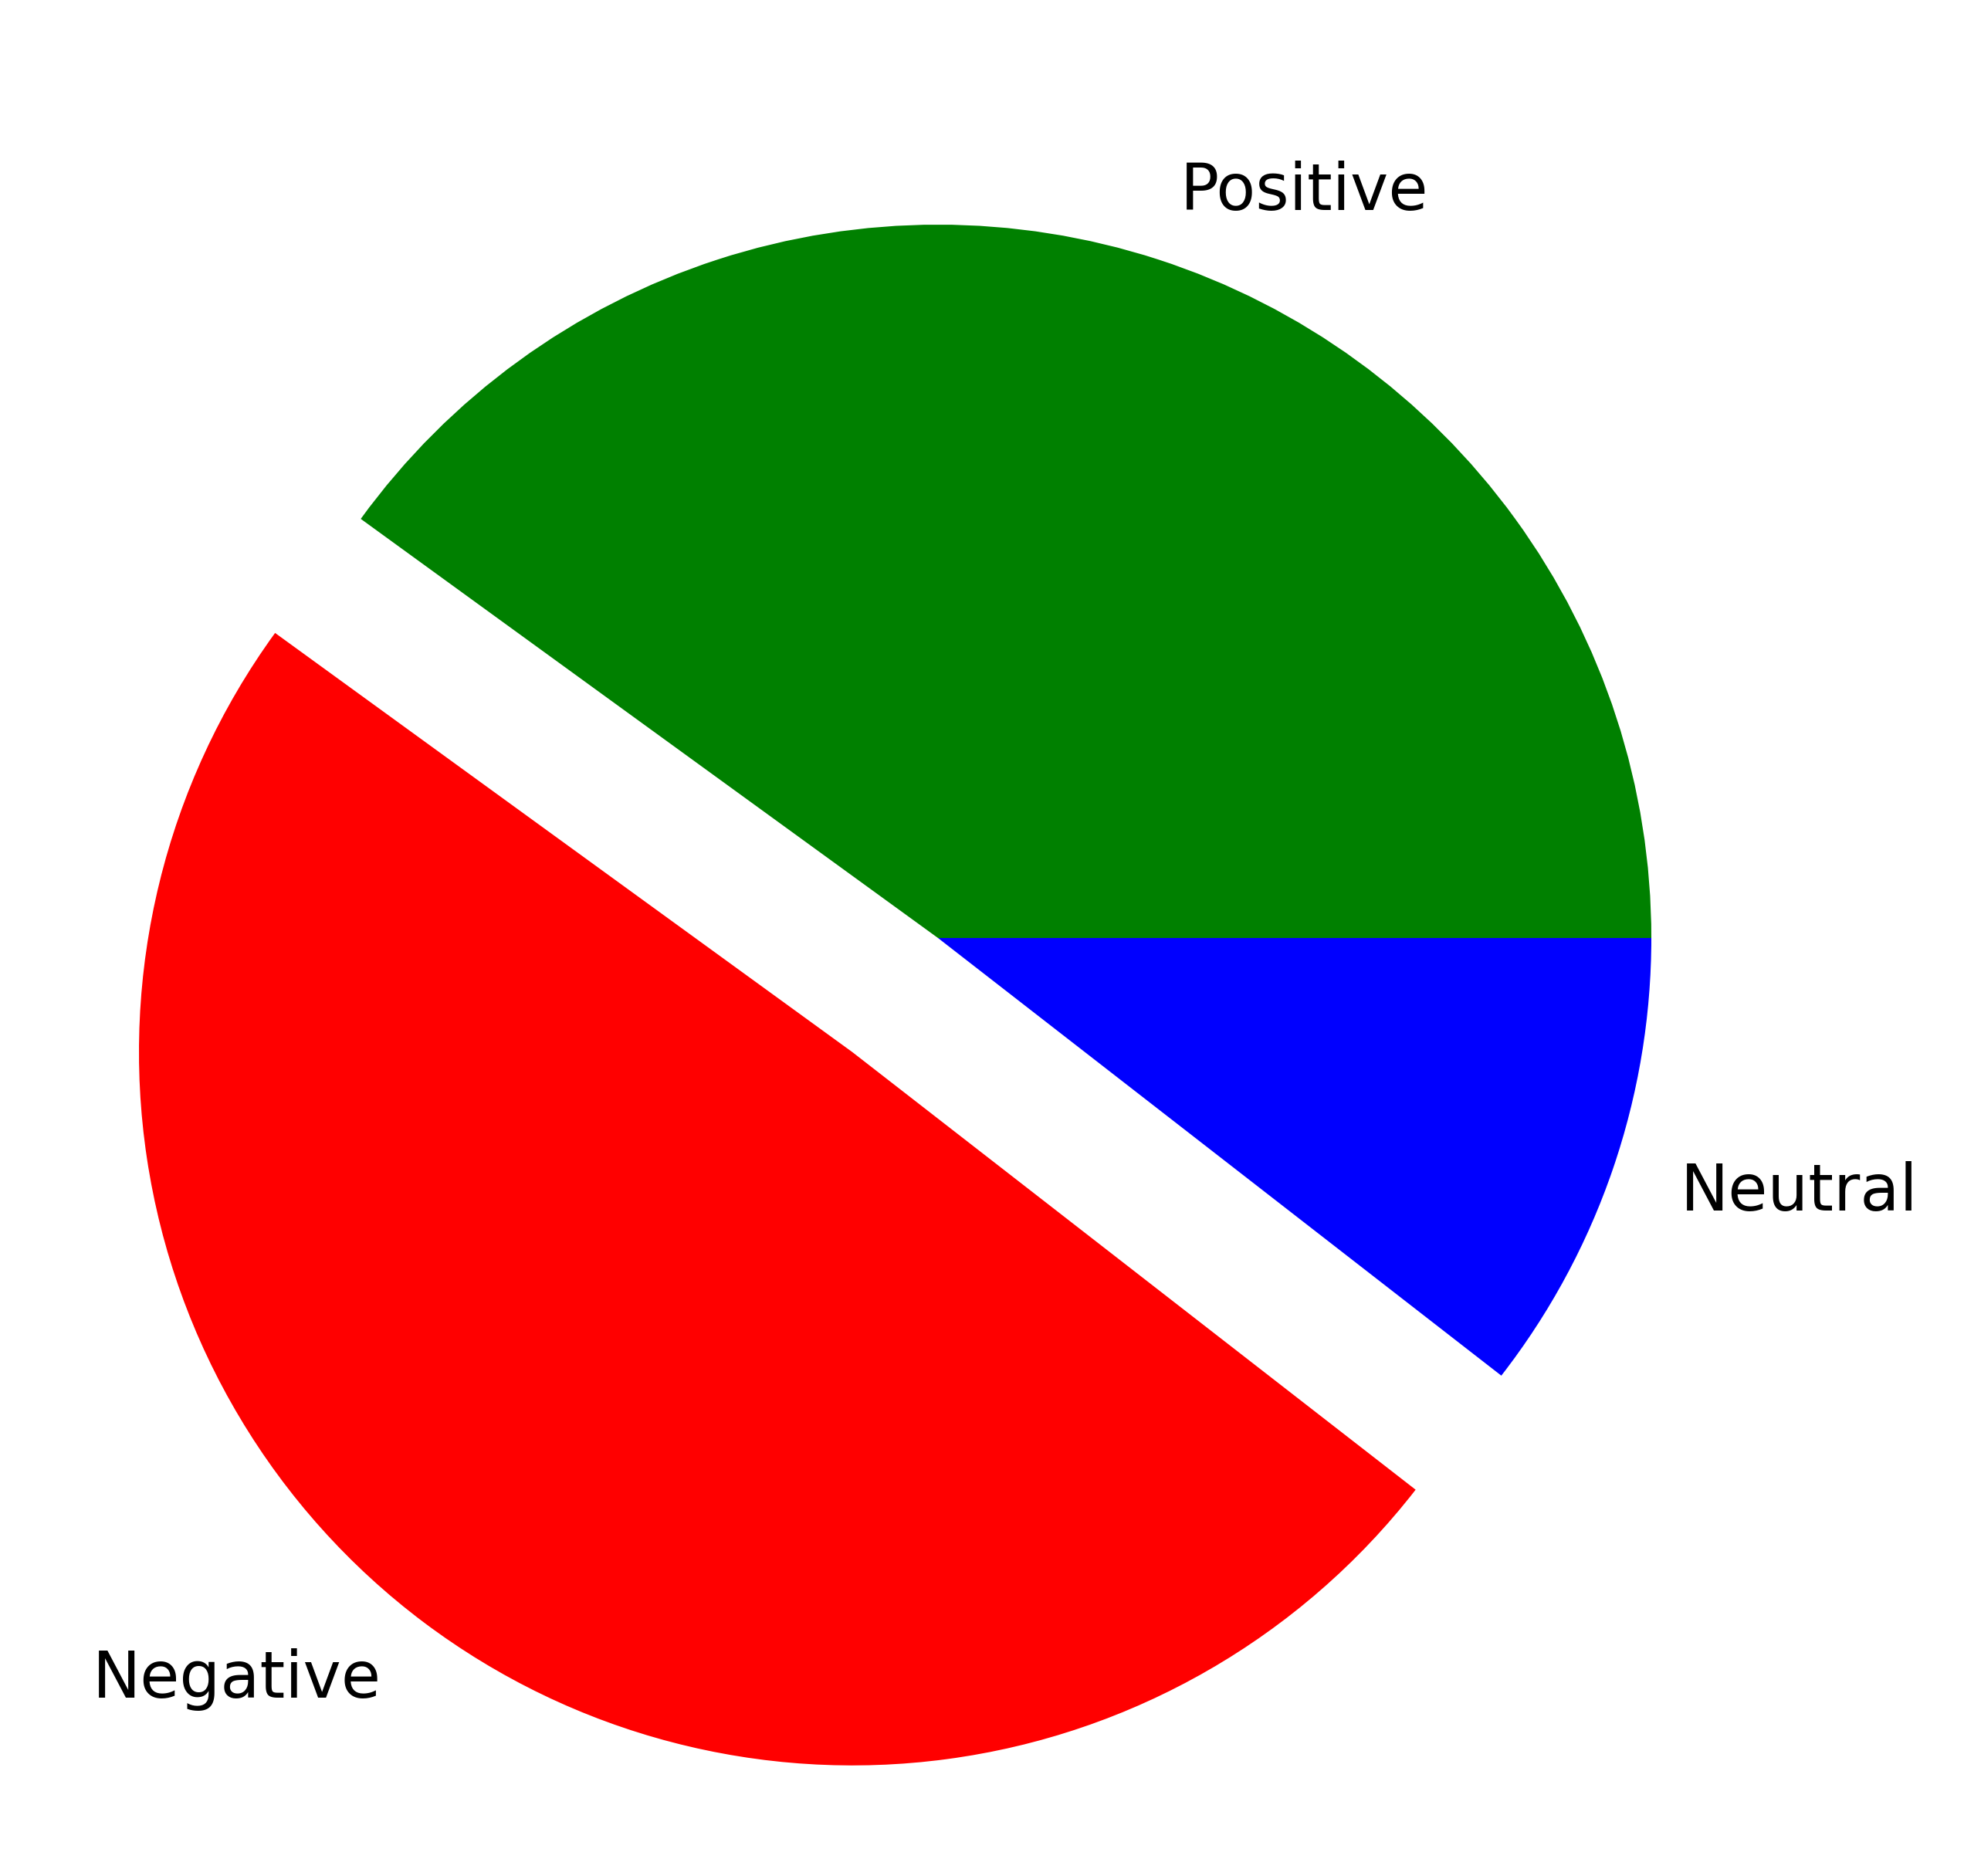

In [65]:
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Green", "Red", "Blue"]

plt.figure(figsize=(8, 5), 
           dpi = 600) # Push new figure on stack
myexplode = [0, 0.2, 0]
plt.pie([total_pos,total_neg,total_neu],colors=mycolors,labels=mylabels,explode = myexplode)
plt.show()

# N-Grams

In [66]:
tw_list=pd.DataFrame(tweets['content'])

In [67]:
tw_list

,content
148495,president biden has agreed to send thousands m...
155093,allen13 then less arm and military ukrai...
26234,joe biden and his administration has turned th...
32748,all big powers right or wrong have a sphere ...
180224,i won t pretend to know whether and if than t...
...,...
96690,new a ukrainian ambassador is being criticiz...
188738,pains xxl i hope you are right but thi...
242700,russia attacks ukraine finland amp sweden...
222294,nato offers tech support after massive cybe...


In [68]:
#Removing Punctuation

In [69]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['content'].apply(lambda x: remove_punct(x))

In [70]:
#Appliyng tokenization

In [71]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [72]:
#Cleaning Text

In [73]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [74]:
#Removing stopwords

In [75]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [76]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))


In [77]:
tw_list.head()

,content,punct,tokenized,nonstop
148495,president biden has agreed to send thousands m...,president biden has agreed to send thousands m...,"[president, biden, has, agreed, to, send, thou...","[president, biden, agreed, send, thousands, tr..."
155093,allen13 then less arm and military ukrai...,allen then less arm and military ukraine...,"[, allen, then, less, arm, and, military, ukra...","[, allen, less, arm, military, ukraine, likely..."
26234,joe biden and his administration has turned th...,joe biden and his administration has turned th...,"[joe, biden, and, his, administration, has, tu...","[joe, biden, administration, turned, back, ukr..."
32748,all big powers right or wrong have a sphere ...,all big powers right or wrong have a sphere ...,"[all, big, powers, right, or, wrong, have, a, ...","[big, powers, right, wrong, sphere, influence,..."
180224,i won t pretend to know whether and if than t...,i won t pretend to know whether and if than t...,"[i, won, t, pretend, to, know, whether, and, i...","[pretend, know, whether, extent, ukraine, cris..."


In [78]:
#Appliyng Countvectorizer

In [79]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [80]:
pip install CountVectorizer

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement CountVectorizer (from versions: none)
ERROR: No matching distribution found for CountVectorizer


In [81]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['content'])

NameError: name 'ps' is not defined

In [82]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

NameError: name 'countVector' is not defined

In [83]:
# Most Used Words

In [84]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

NameError: name 'count_vect_df' is not defined

In [85]:
#Function to ngram

In [86]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [87]:
#n1_unigram

In [88]:
n1_unigrams = get_top_n_gram(tw_list['content'],(1,1),20)

In [89]:
# Push new figure on stack

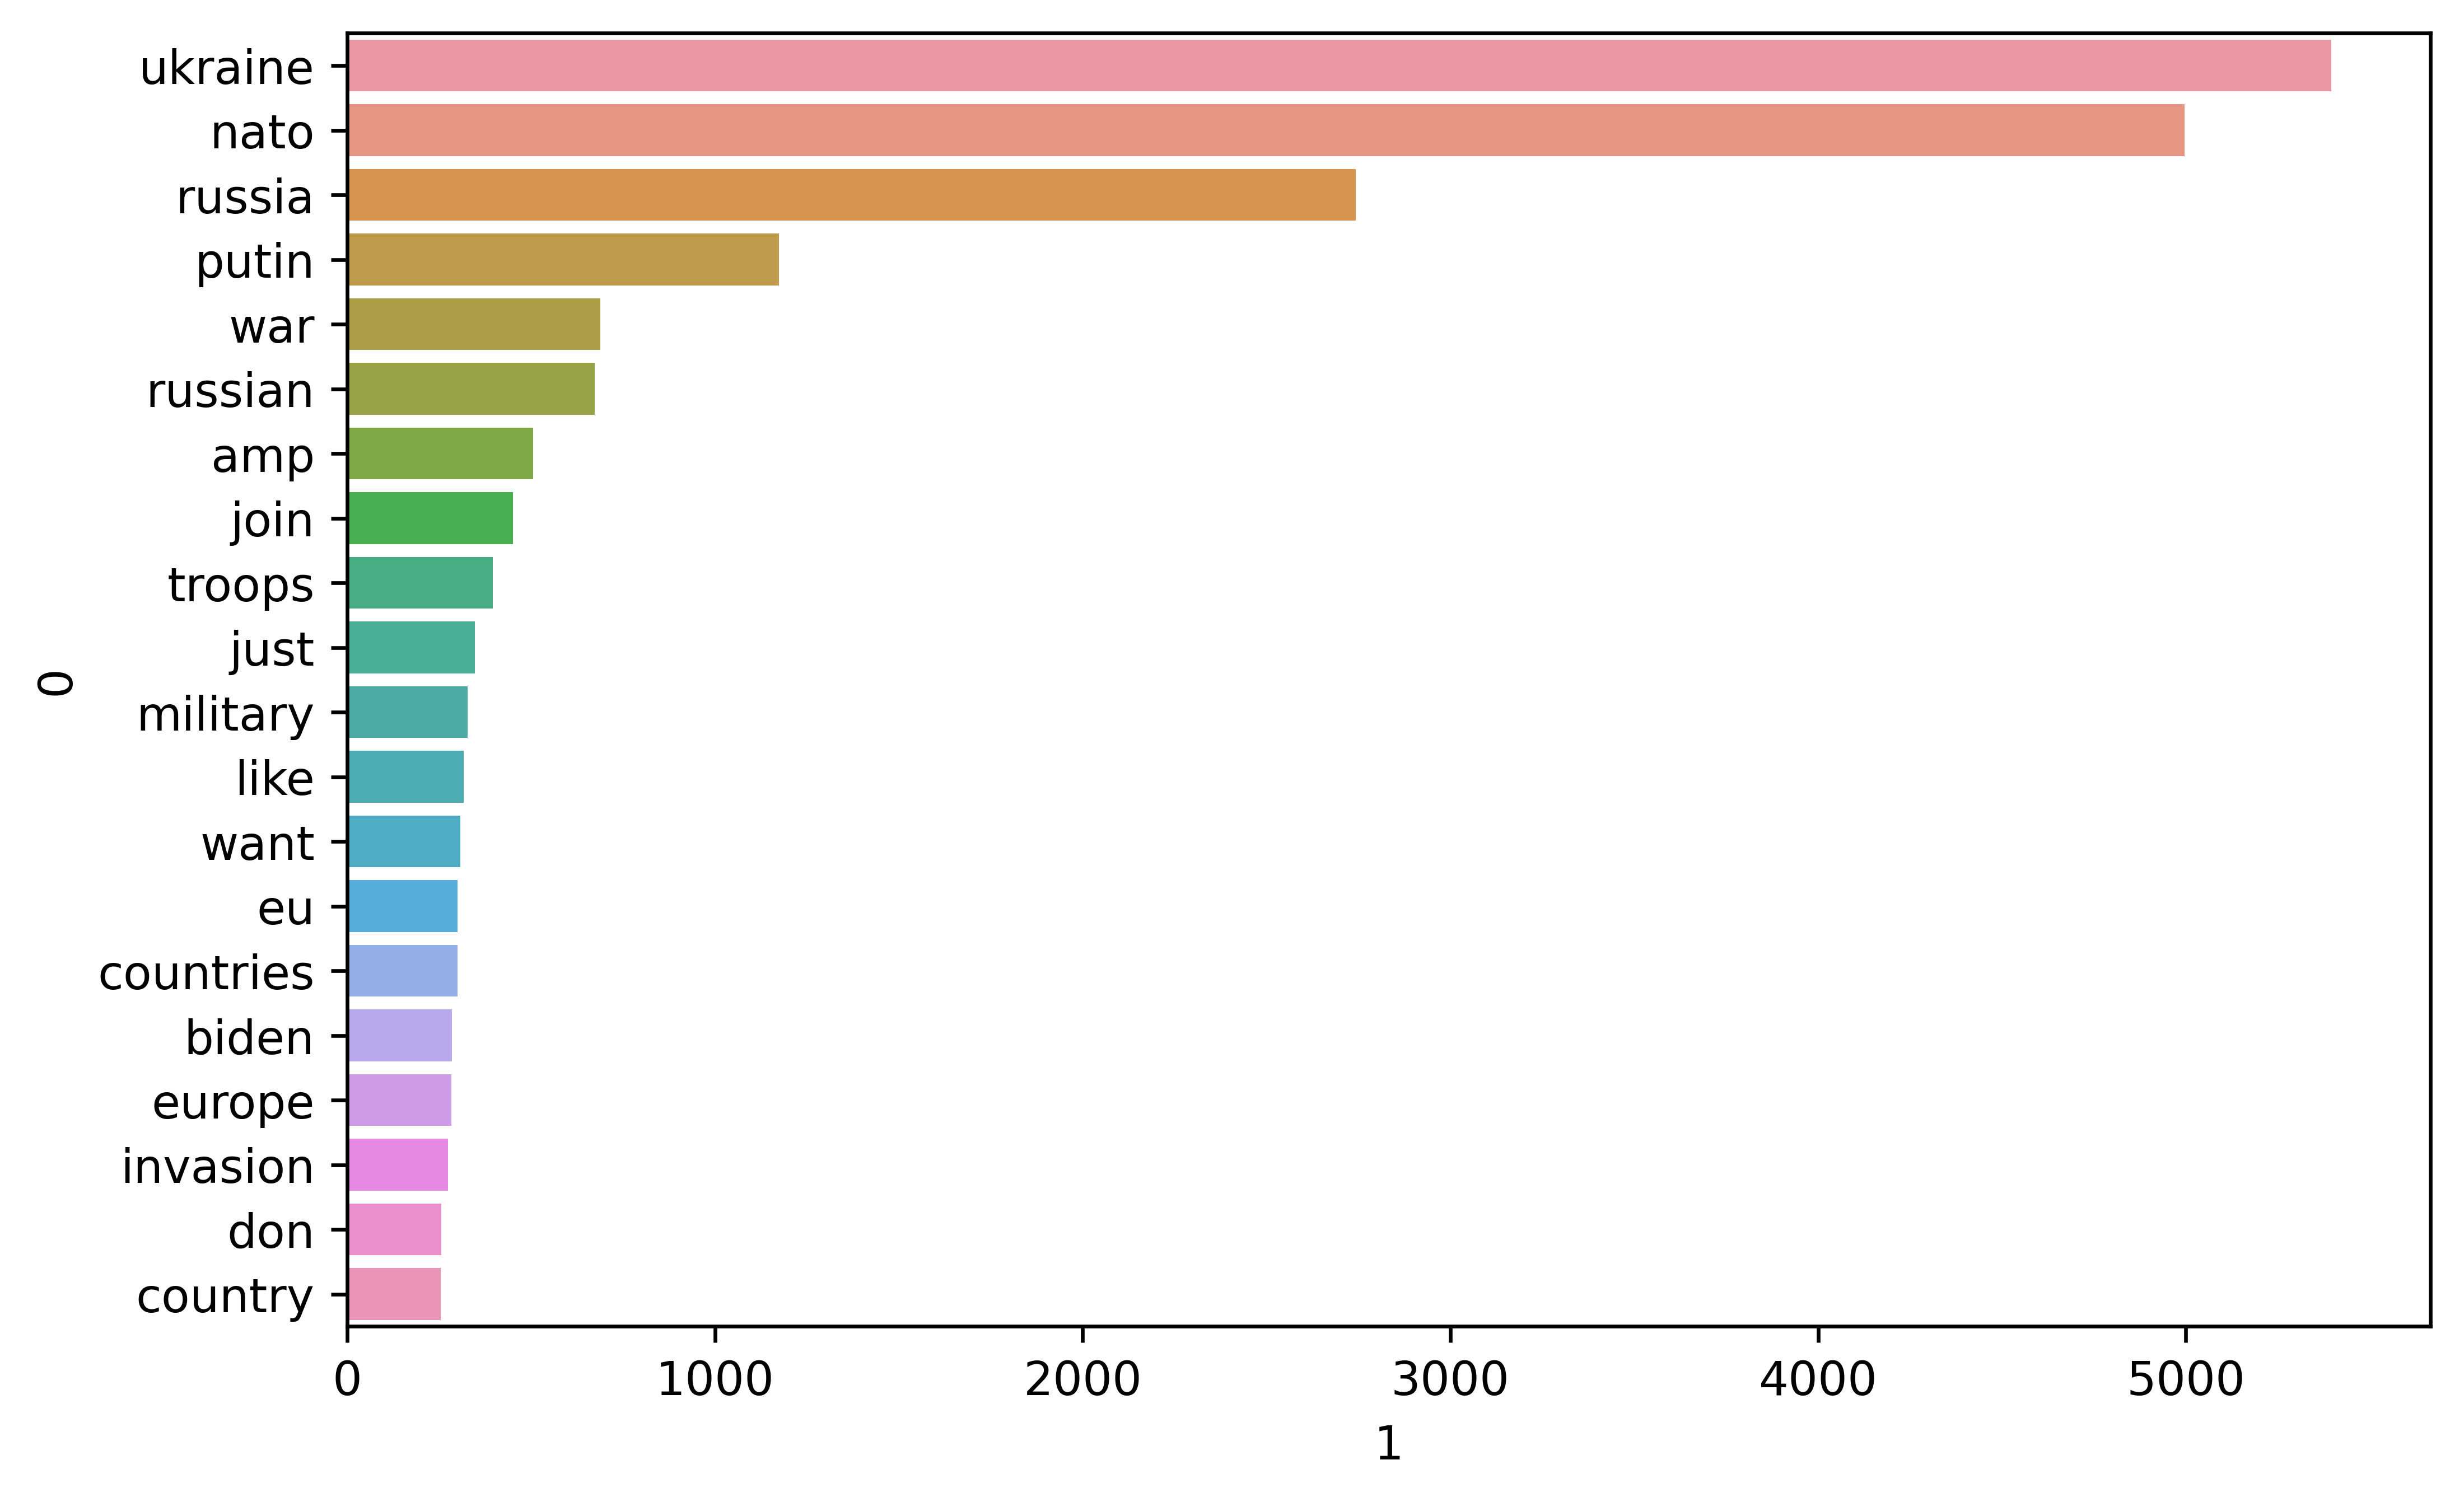

In [90]:
plt.figure(figsize=(8, 5), 
           dpi = 600) # Push new figure on stack
sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n1_unigrams))
plt.savefig('unigram.jpg') # Save that figure

In [91]:
#n2_bigram

In [92]:
n2_bigrams = get_top_n_gram(tw_list['content'],(2,2),20)

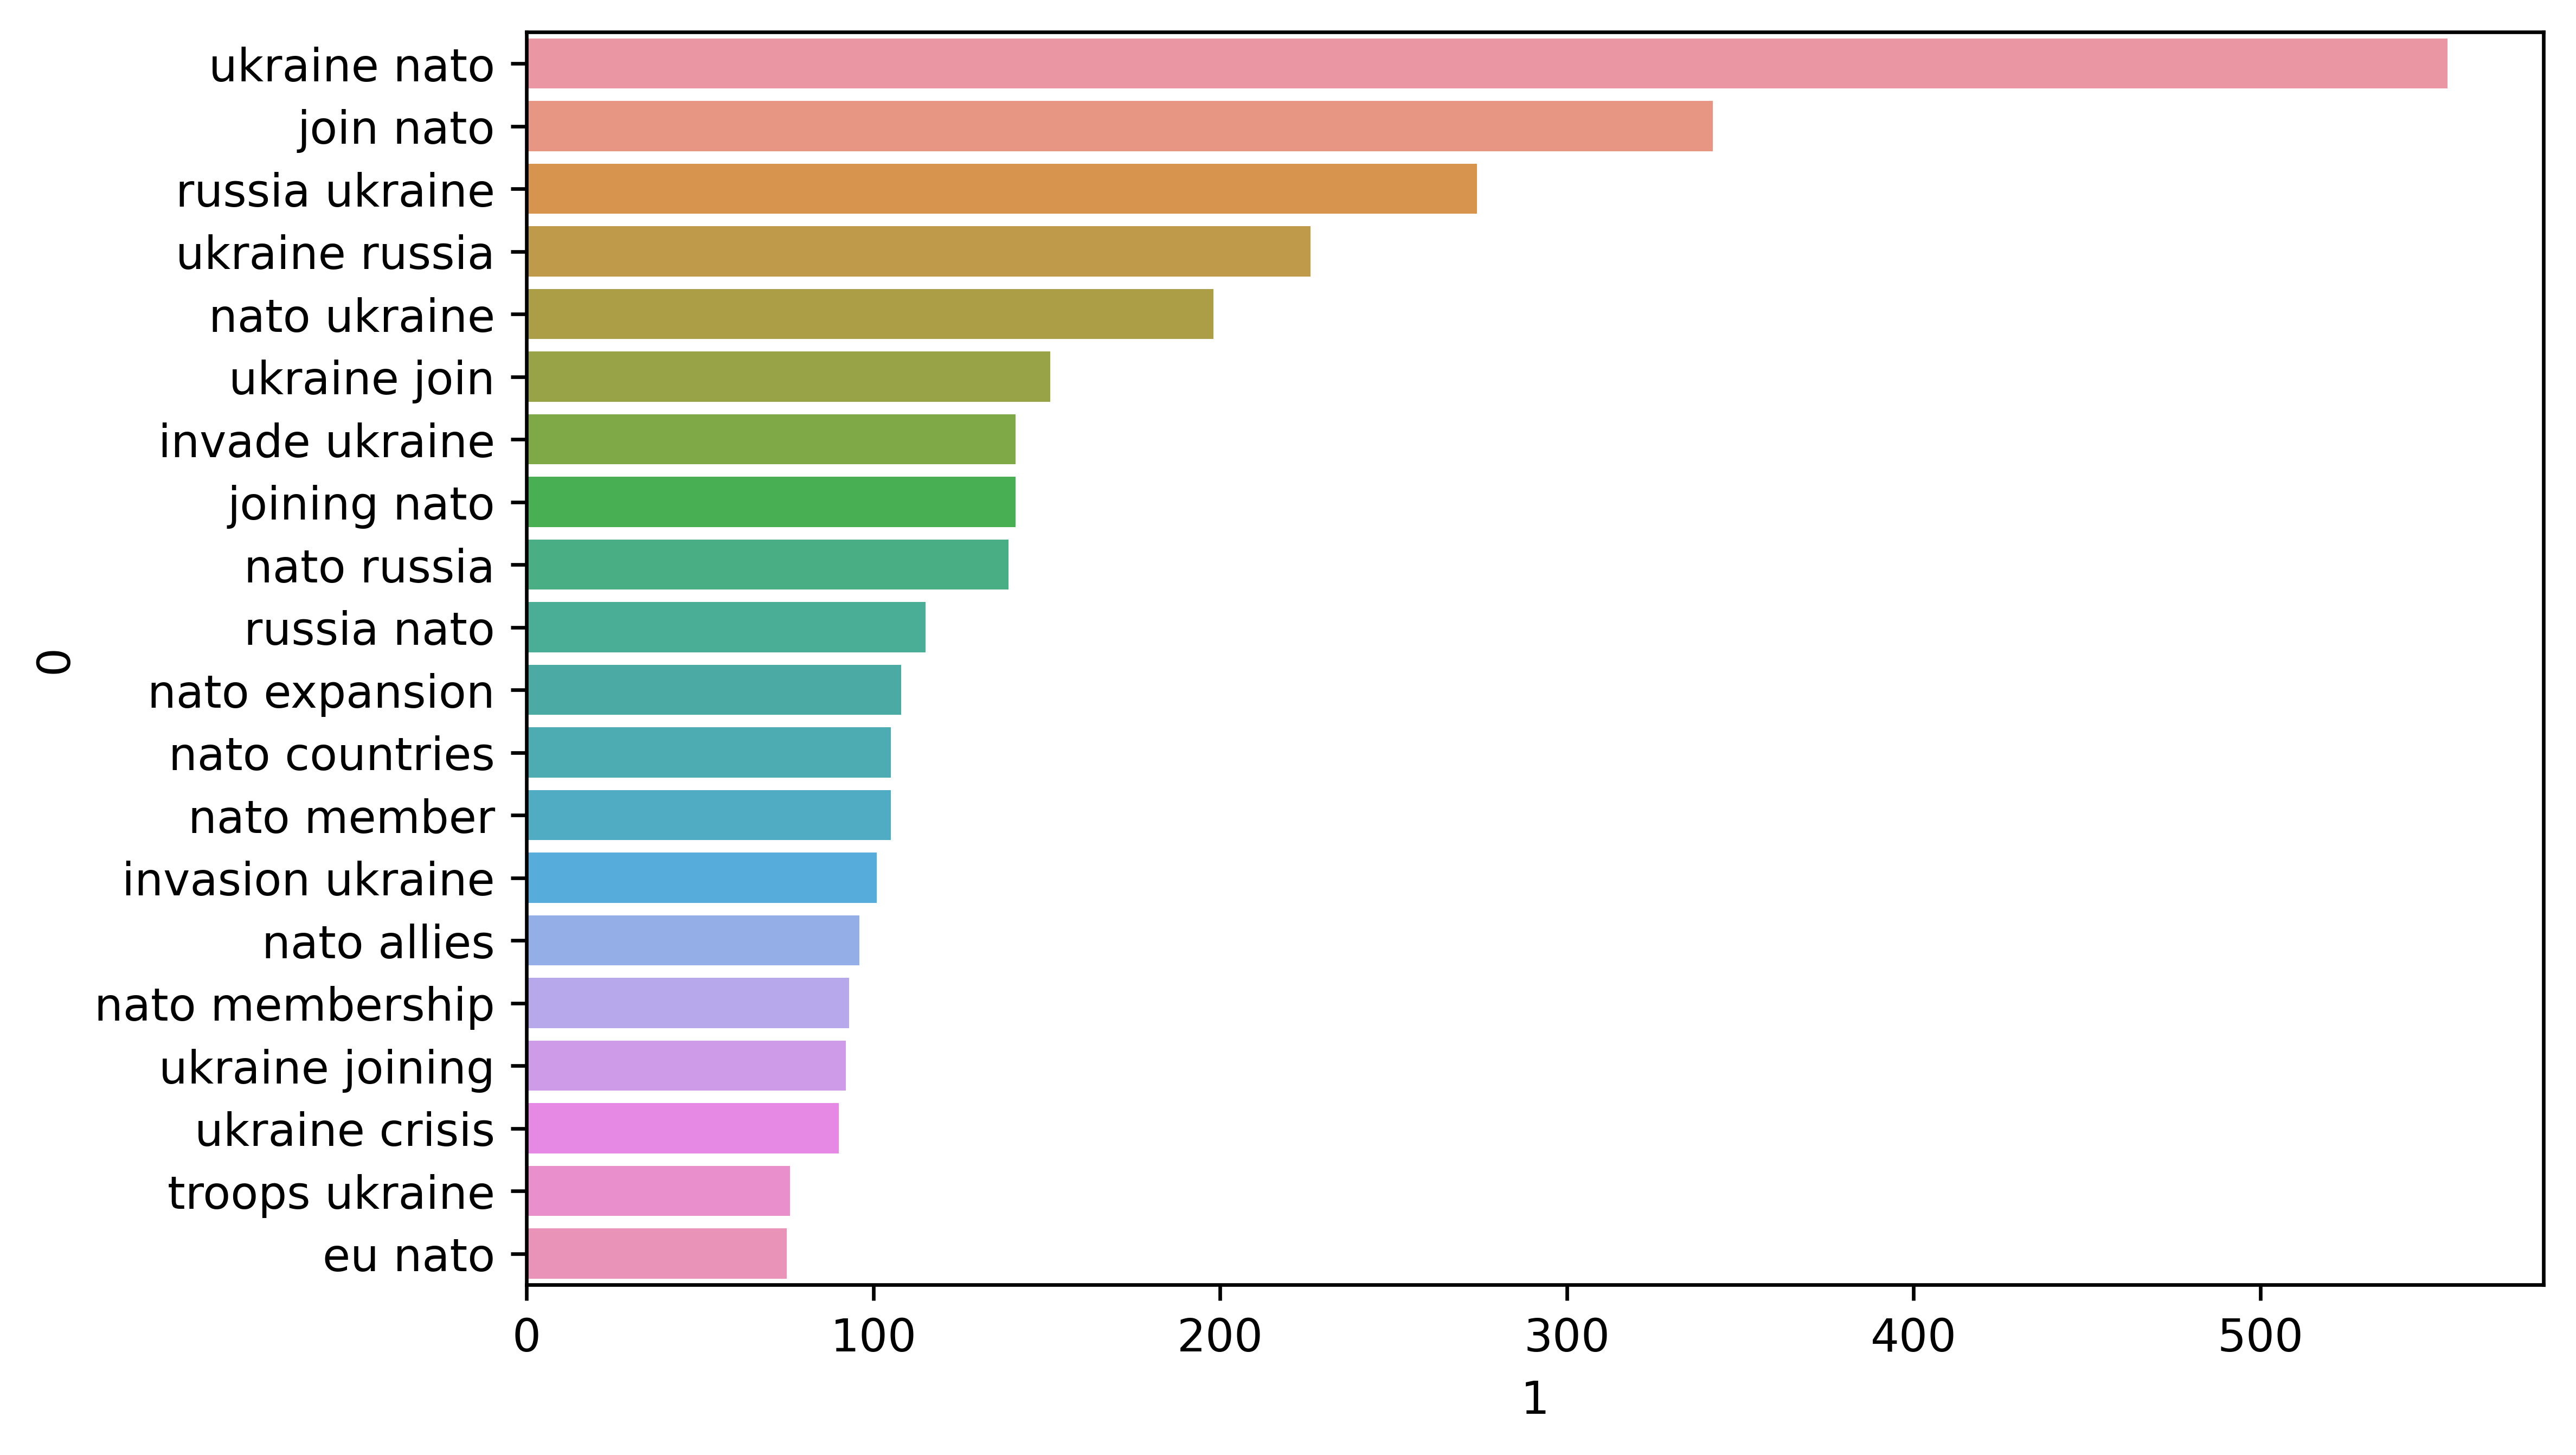

In [93]:
plt.figure(figsize=(8, 5), 
           dpi = 600) # Push new figure on stack
sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n2_bigrams))
plt.savefig('bigram.jpg') # Save that figure

In [94]:
# word frequency 

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

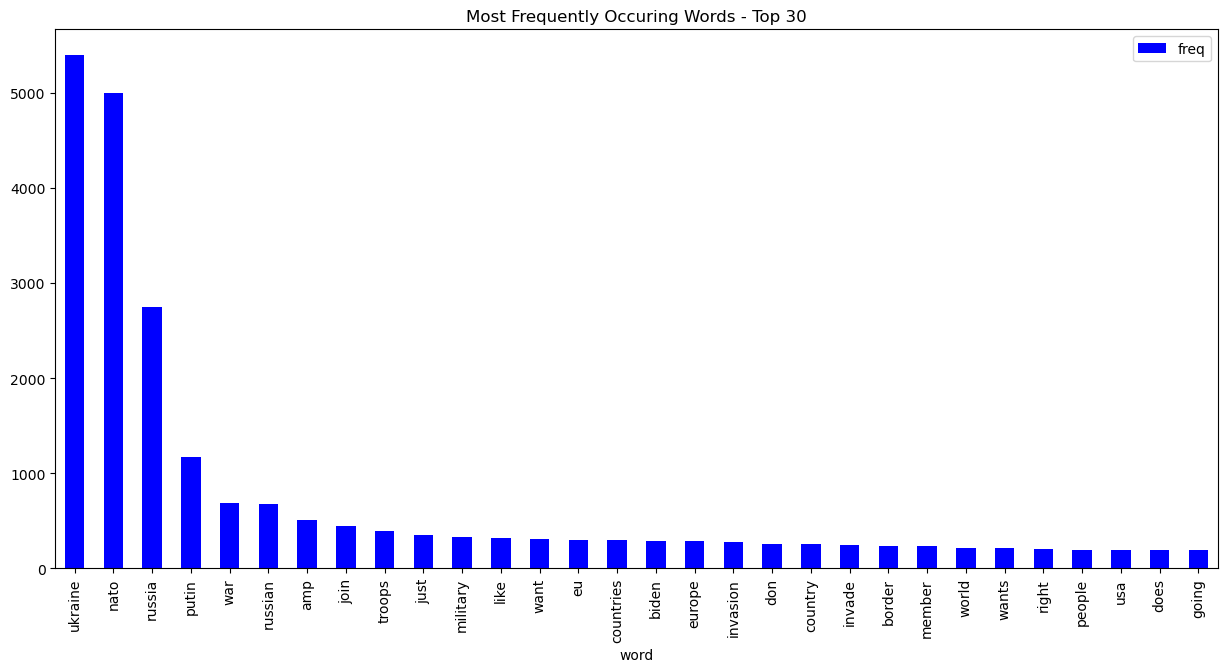

In [95]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tweets.content)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [96]:
# WordCloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

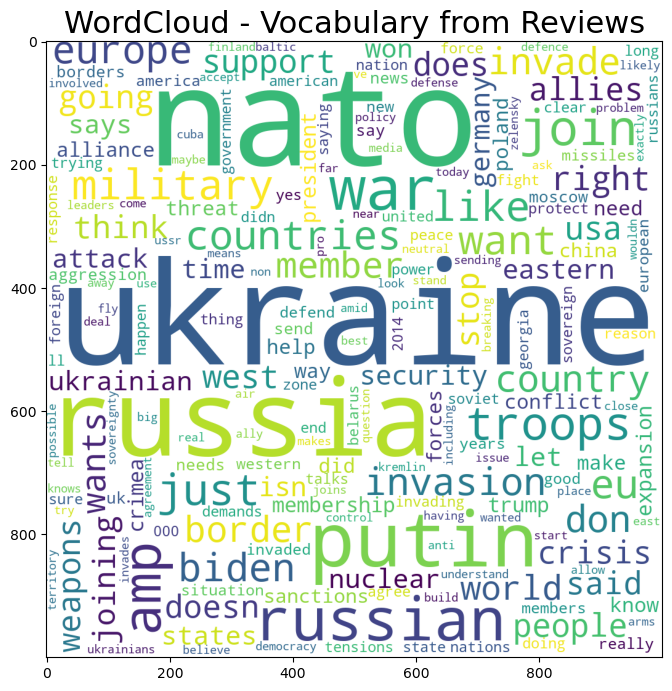

In [97]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [ ]:
# plot dateise poloriwty graph